<a href="https://colab.research.google.com/github/yadavrahyl2k15/handling_imbalanced_dataset/blob/main/handling_imbalanced_dataset_oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/creditcard.csv",sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
#create dependent and independent features
columns=df.columns.to_list()
target=columns[-1]
columns=columns[:-1]

In [ ]:
state=np.random.RandomState(42)
x=df[columns]
y=df[target]
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


**EXPLOTAORY DATA ANALYSIS**



In [ ]:
df.isnull().values.any()

False

([<matplotlib.axis.XTick at 0x7fd17608b9b0>,
 [Text(0, 0, 'Normal'), Text(0, 0, 'FRAUD')])

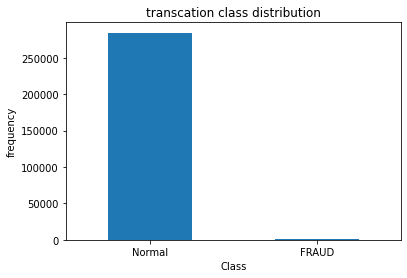

In [ ]:
count_classes=pd.value_counts(df['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('transcation class distribution')
plt.xlabel('Class')
plt.ylabel("frequency")
LABELS=['Normal','FRAUD']
plt.xticks(range(2),LABELS)

In [ ]:
normal=df[df['Class']==0]
fraud=df[df['Class']==1]
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(ratio=1)   #RATIO IS WHAT YOU WANT PROBABILITY OF CATEGORIES.IF 0.5 THEN IT IS HALF


In [ ]:
x_res,y_res=os.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x_res.shape)
print(y_res.shape)

(568630, 30)
(568630,)


In [ ]:
from collections import Counter
print("original dataset is {}".format(Counter(y)))
print("reshaped dataset is {}".format(Counter(y_res)))

original dataset is Counter({0: 284315, 1: 492})
reshaped dataset is Counter({0: 284315, 1: 284315})


**ALTERNATE METHOD FOR OVERSAMPLING**

In [ ]:
from imblearn.combine import SMOTETomek
smk= SMOTETomek(random_state=42)
x_re,y_re=smk.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x_re.shape)
print(y_re.shape)

(567562, 30)
(567562,)


In [ ]:
from collections import Counter
print('original dataset is {}.'.format(Counter(y)))
print("reshaped dadaset is {}.".format(Counter(y_re)))

original dataset is Counter({0: 284315, 1: 492}).
reshaped dadaset is Counter({0: 283781, 1: 283781}).
